<a href="https://colab.research.google.com/github/mohadi21/Apprentissage-supervise-Detection-de-fraude-dans-des-transactions-bancaires/blob/main/App_sup__Visa_Premier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projet « Apprentissage supervisé »**
## Master2 MLSD
Mohamed BOUDJEMAI



**a. Carte visa :** 

le scoring d’une base de données de « carte visa ». En résumé, il s’agit de travailler dans ce projet sur une base de données décrivant les clients d’une banque et leurs comportements (mouvements, soldes des différents comptes). L’objectif est l’estimation d’un score d’appétence à la carte VISA Premier. C’est une carte de paiement haut de gamme qui cherche à renforcer le lien de proximité avec la banque en vue de fidéliser une clientèle aisée.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# prétraitement
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


# évaluation
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import precision_recall_curve, recall_score

# modèles
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# **Data**

In [ ]:
data= pd.read_table('/content/VisaPremier.txt')

In [ ]:
data.head()

matricul departem  ptvente  sexe  ...  cartevp sexer  cartevpr nbjdebit
0    148009       31        1  Shom  ...     Coui     0         1        1
1    442153       82        6  Shom  ...     Coui     0         1        0
2    552427       97        1  Shom  ...     Coui     0         1        0
3    556005       40        1  Shom  ...     Coui     0         1        0
4    556686       65        1  Shom  ...     Coui     0         1       15

[5 rows x 48 columns]

In [ ]:
data.shape

(1073, 48)

In [ ]:
data.describe()

matricul     ptvente  ...     cartevpr     nbjdebit
count  1.073000e+03  1073.00000  ...  1073.000000  1073.000000
mean   2.489307e+06     1.66356  ...     0.334576    12.084809
std    1.925341e+06     1.08567  ...     0.472062    23.335589
min    1.133330e+05     1.00000  ...     0.000000     0.000000
25%    8.604360e+05     1.00000  ...     0.000000     0.000000
50%    1.948586e+06     1.00000  ...     0.000000     0.000000
75%    3.901594e+06     2.00000  ...     1.000000    10.000000
max    7.589439e+06     7.00000  ...     1.000000   134.000000

[8 rows x 40 columns]

In [ ]:
df = data.copy()

[]

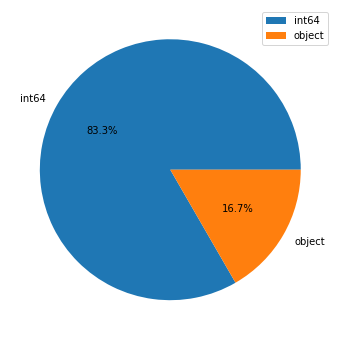

In [ ]:
#type de variables 
df.dtypes.value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="")
plt.legend()
plt.plot()

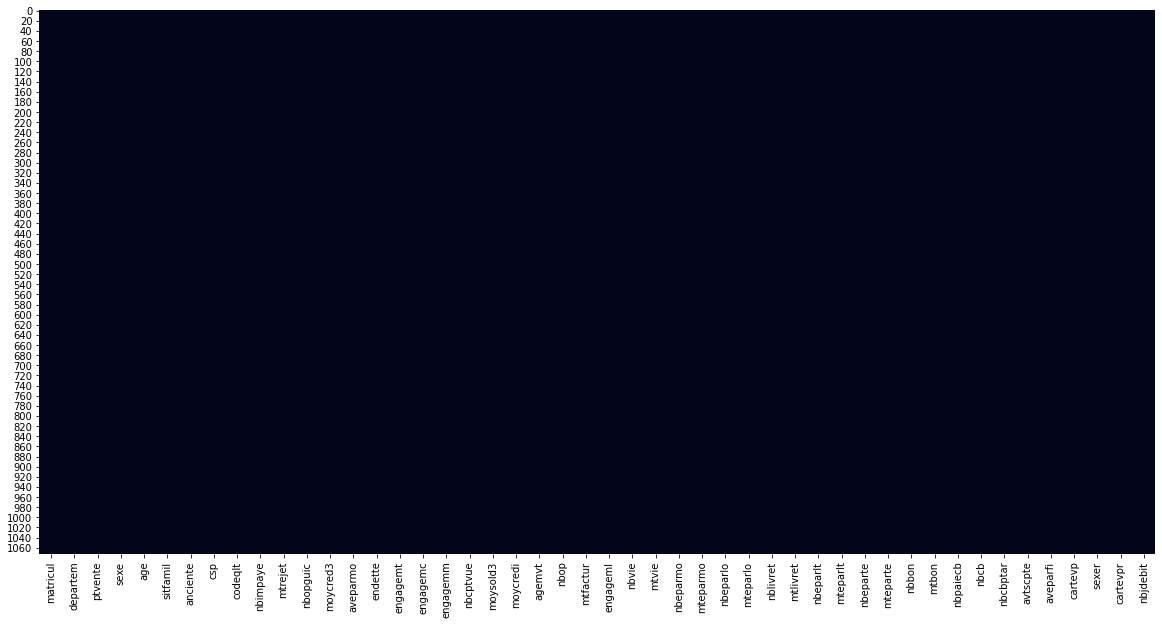

In [ ]:
#valeur manquante 
plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)


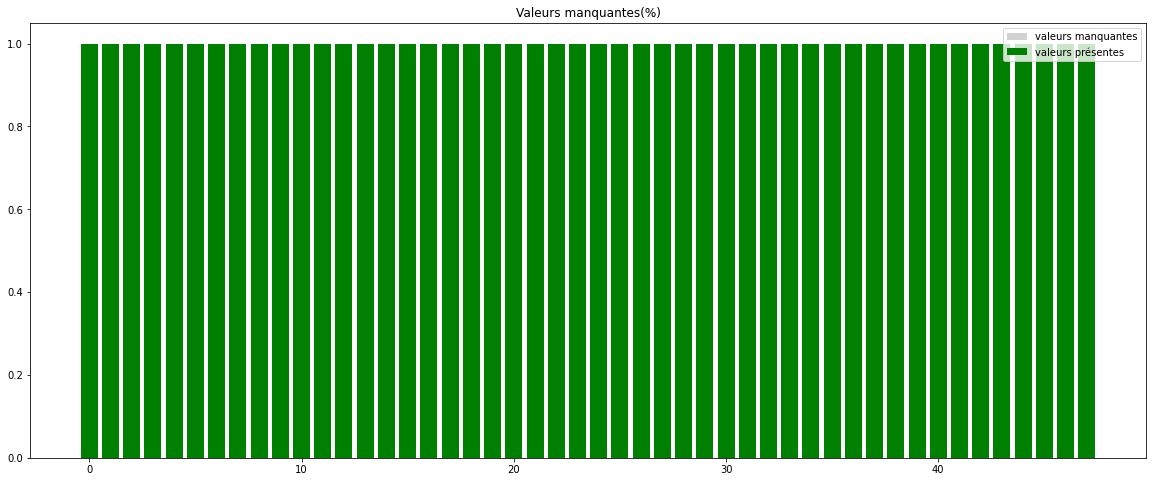

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Valeurs manquantes(%)")
plt.bar(range(data.shape[1]), np.ones(data.shape[1]), label="valeurs manquantes", color="#adb3ae94")
plt.bar(range(data.shape[1]), (data.shape[0]-data.isnull().sum())/data.shape[0], label="valeurs présentes", color="green")
plt.legend()
plt.show()

pas de valeurs manquates

# **Meaning of variables**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

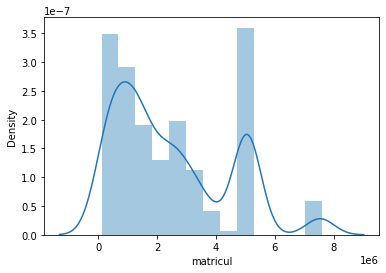

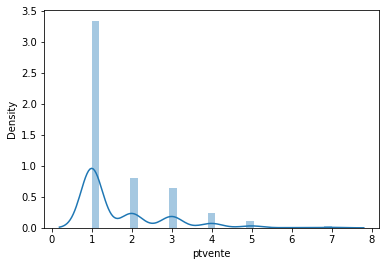

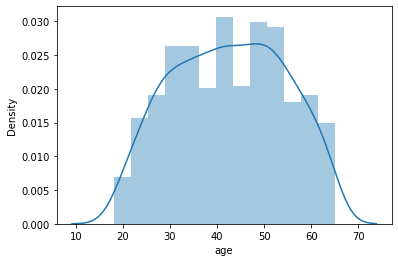

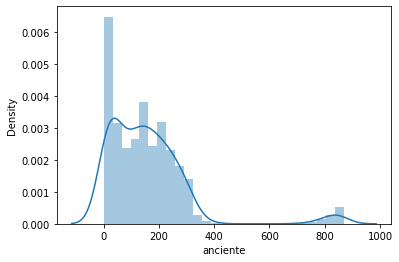

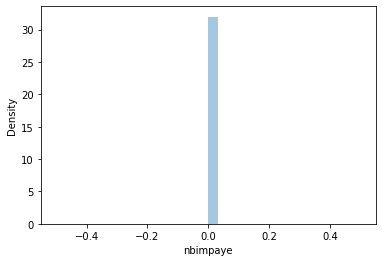

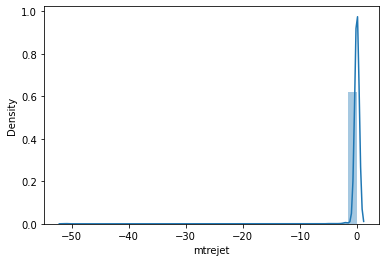

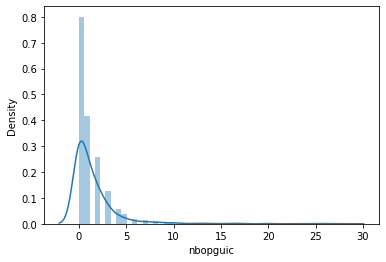

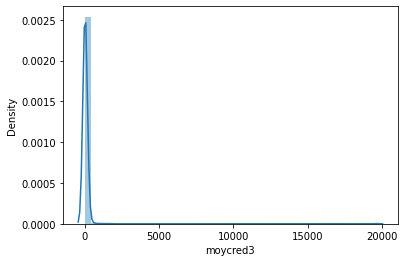

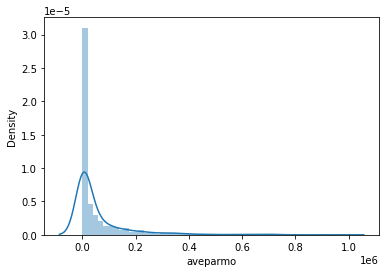

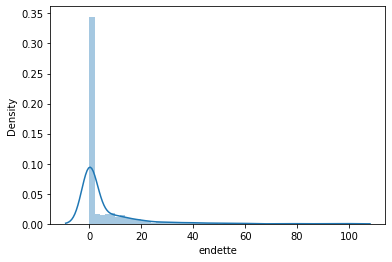

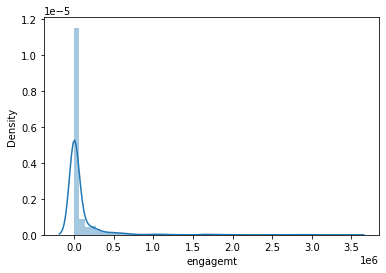

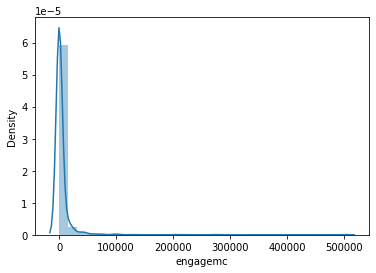

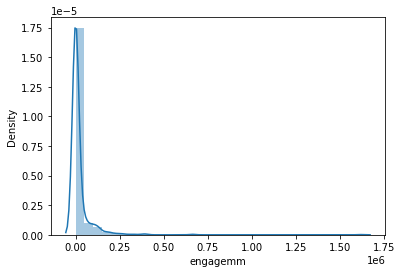

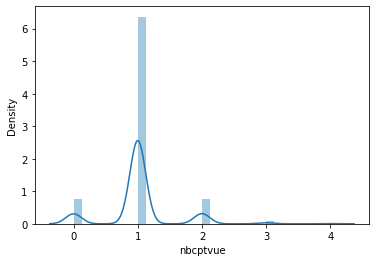

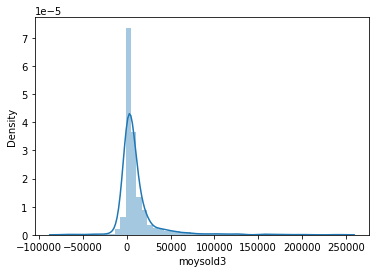

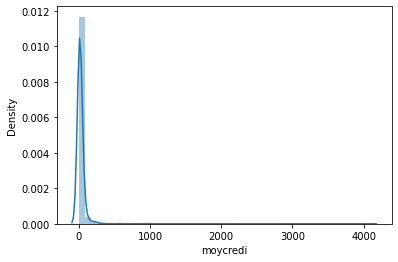

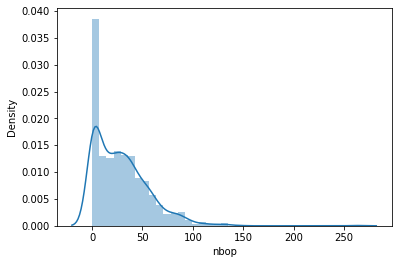

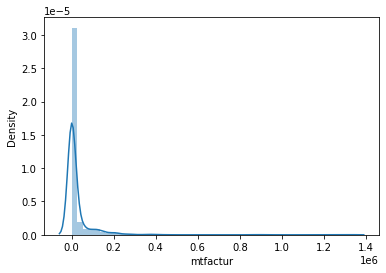

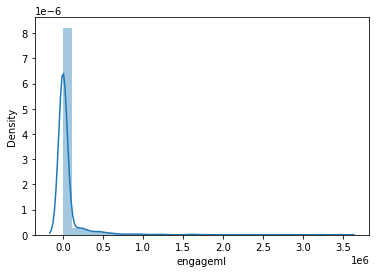

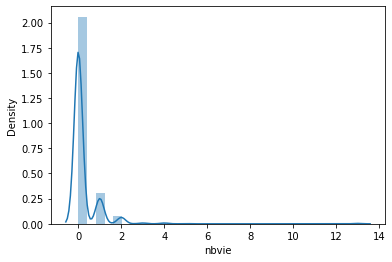

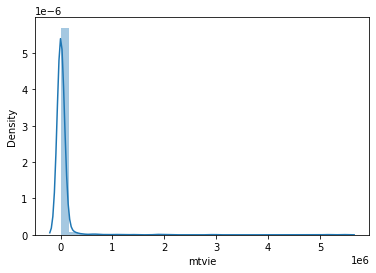

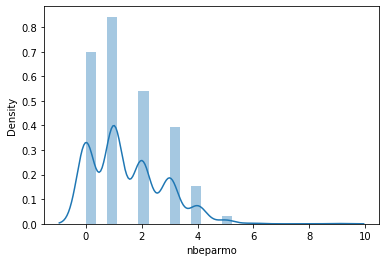

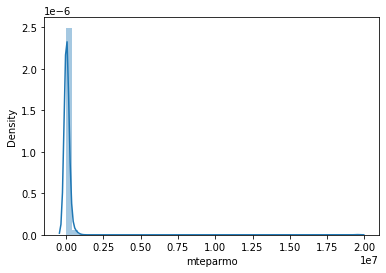

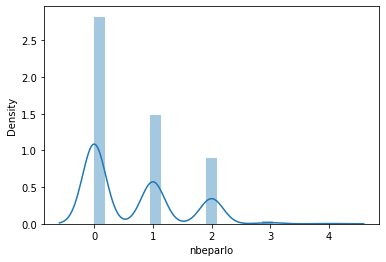

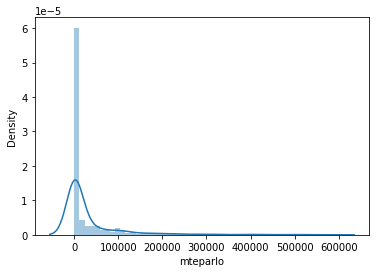

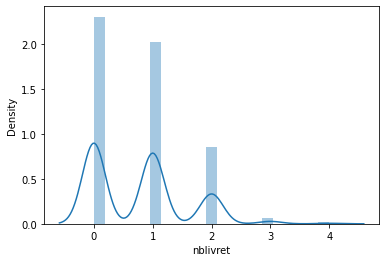

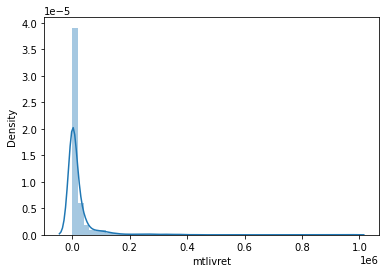

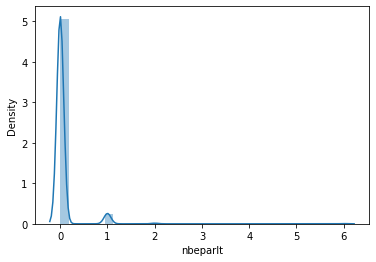

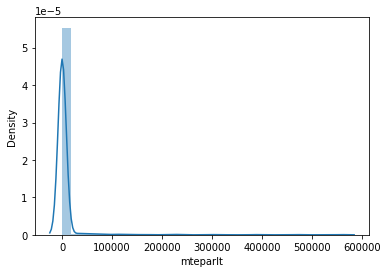

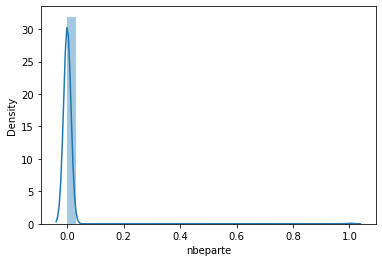

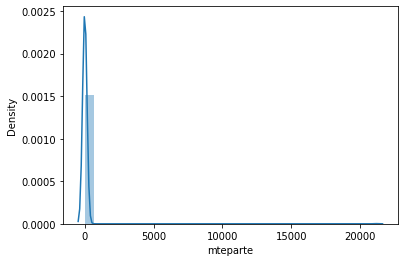

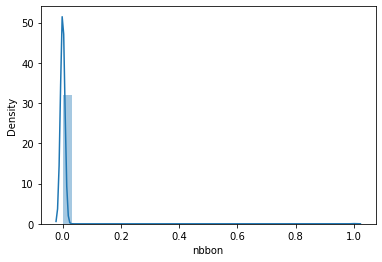

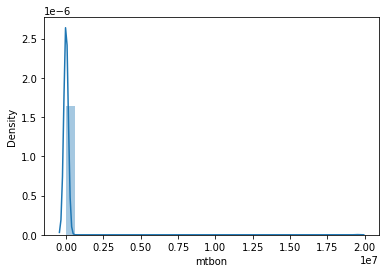

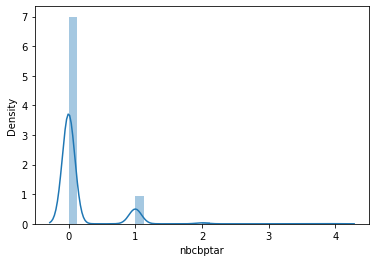

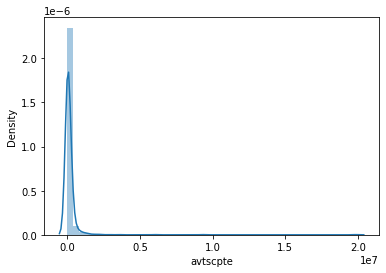

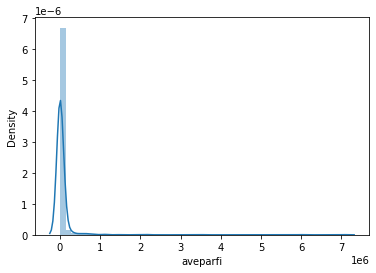

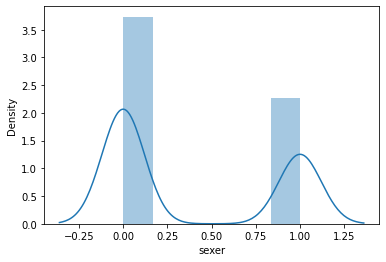

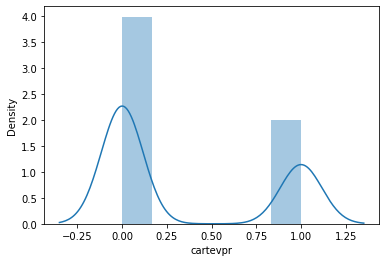

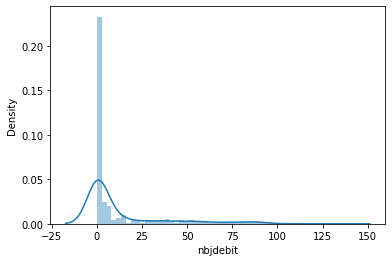

In [ ]:
# Variables continues
for col in df.select_dtypes('int'):
    plt.figure()
    sns.distplot(df[col])
plt.show()

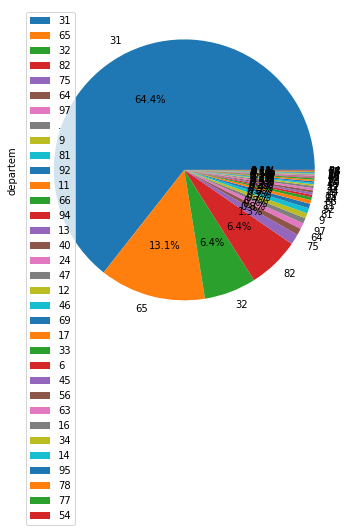

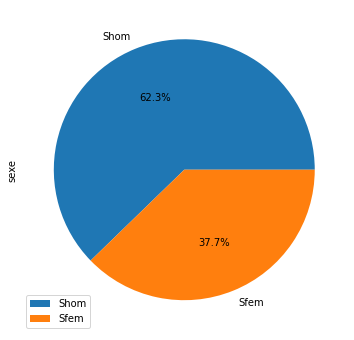

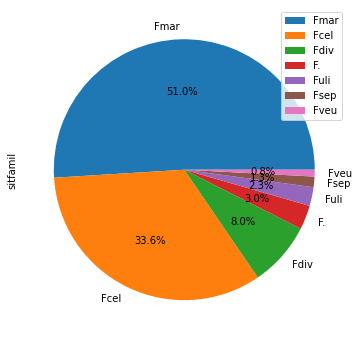

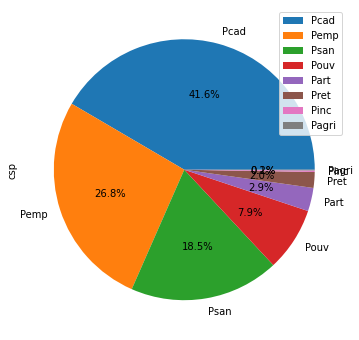

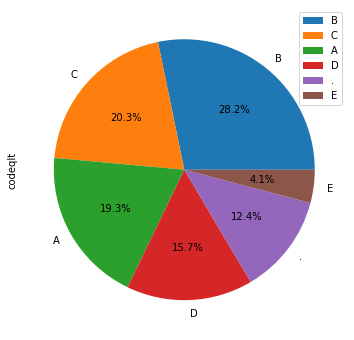

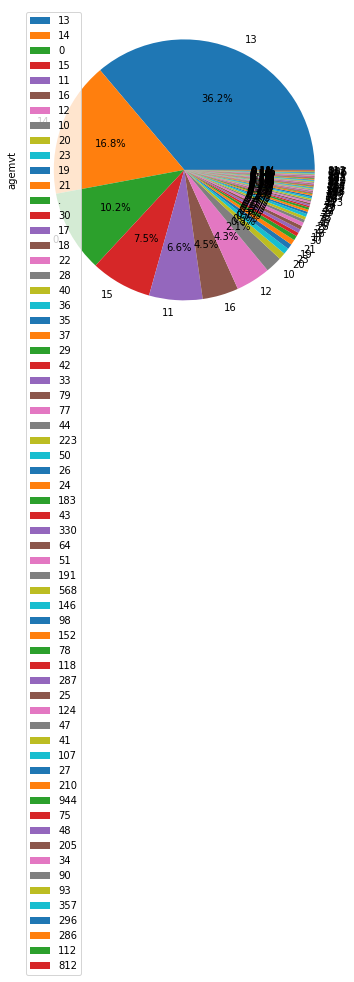

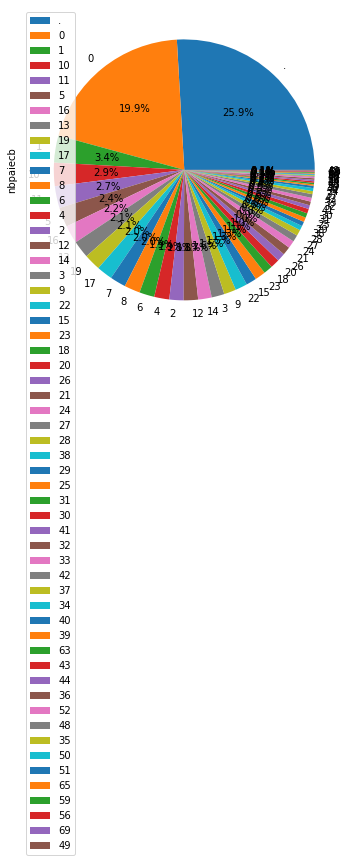

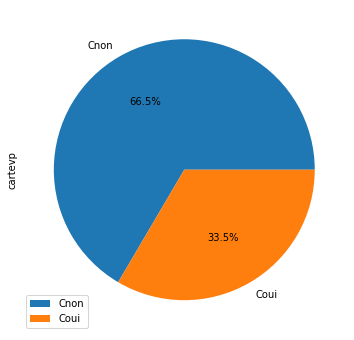

In [ ]:
# Variables Qualitatives
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6, 6), label=col)
    plt.legend()
    plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1073 entries, 0 to 1072
Data columns (total 48 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   matricul  1073 non-null   int64 
 1   departem  1073 non-null   object
 2   ptvente   1073 non-null   int64 
 3   sexe      1073 non-null   object
 4   age       1073 non-null   int64 
 5   sitfamil  1073 non-null   object
 6   anciente  1073 non-null   int64 
 7   csp       1073 non-null   object
 8   codeqlt   1073 non-null   object
 9   nbimpaye  1073 non-null   int64 
 10  mtrejet   1073 non-null   int64 
 11  nbopguic  1073 non-null   int64 
 12  moycred3  1073 non-null   int64 
 13  aveparmo  1073 non-null   int64 
 14  endette   1073 non-null   int64 
 15  engagemt  1073 non-null   int64 
 16  engagemc  1073 non-null   int64 
 17  engagemm  1073 non-null   int64 
 18  nbcptvue  1073 non-null   int64 
 19  moysold3  1073 non-null   int64 
 20  moycredi  1073 non-null   int64 
 21  agemvt    1073

# **Variables / Target **

In [ ]:
positive_df = df[df['cartevpr'] == 0]

negative_df = df[df['cartevpr'] == 1]

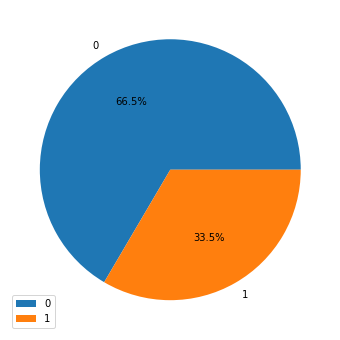

In [ ]:
df['cartevpr'].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6), label="")
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class Distributions \n (0 || 1)')

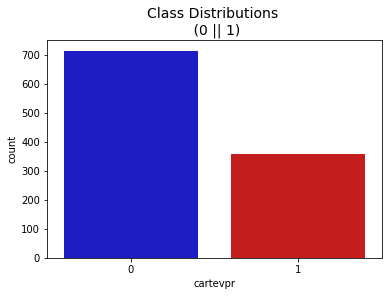

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('cartevpr', data=df, palette=colors)
plt.title('Class Distributions \n (0 || 1)', fontsize=14)

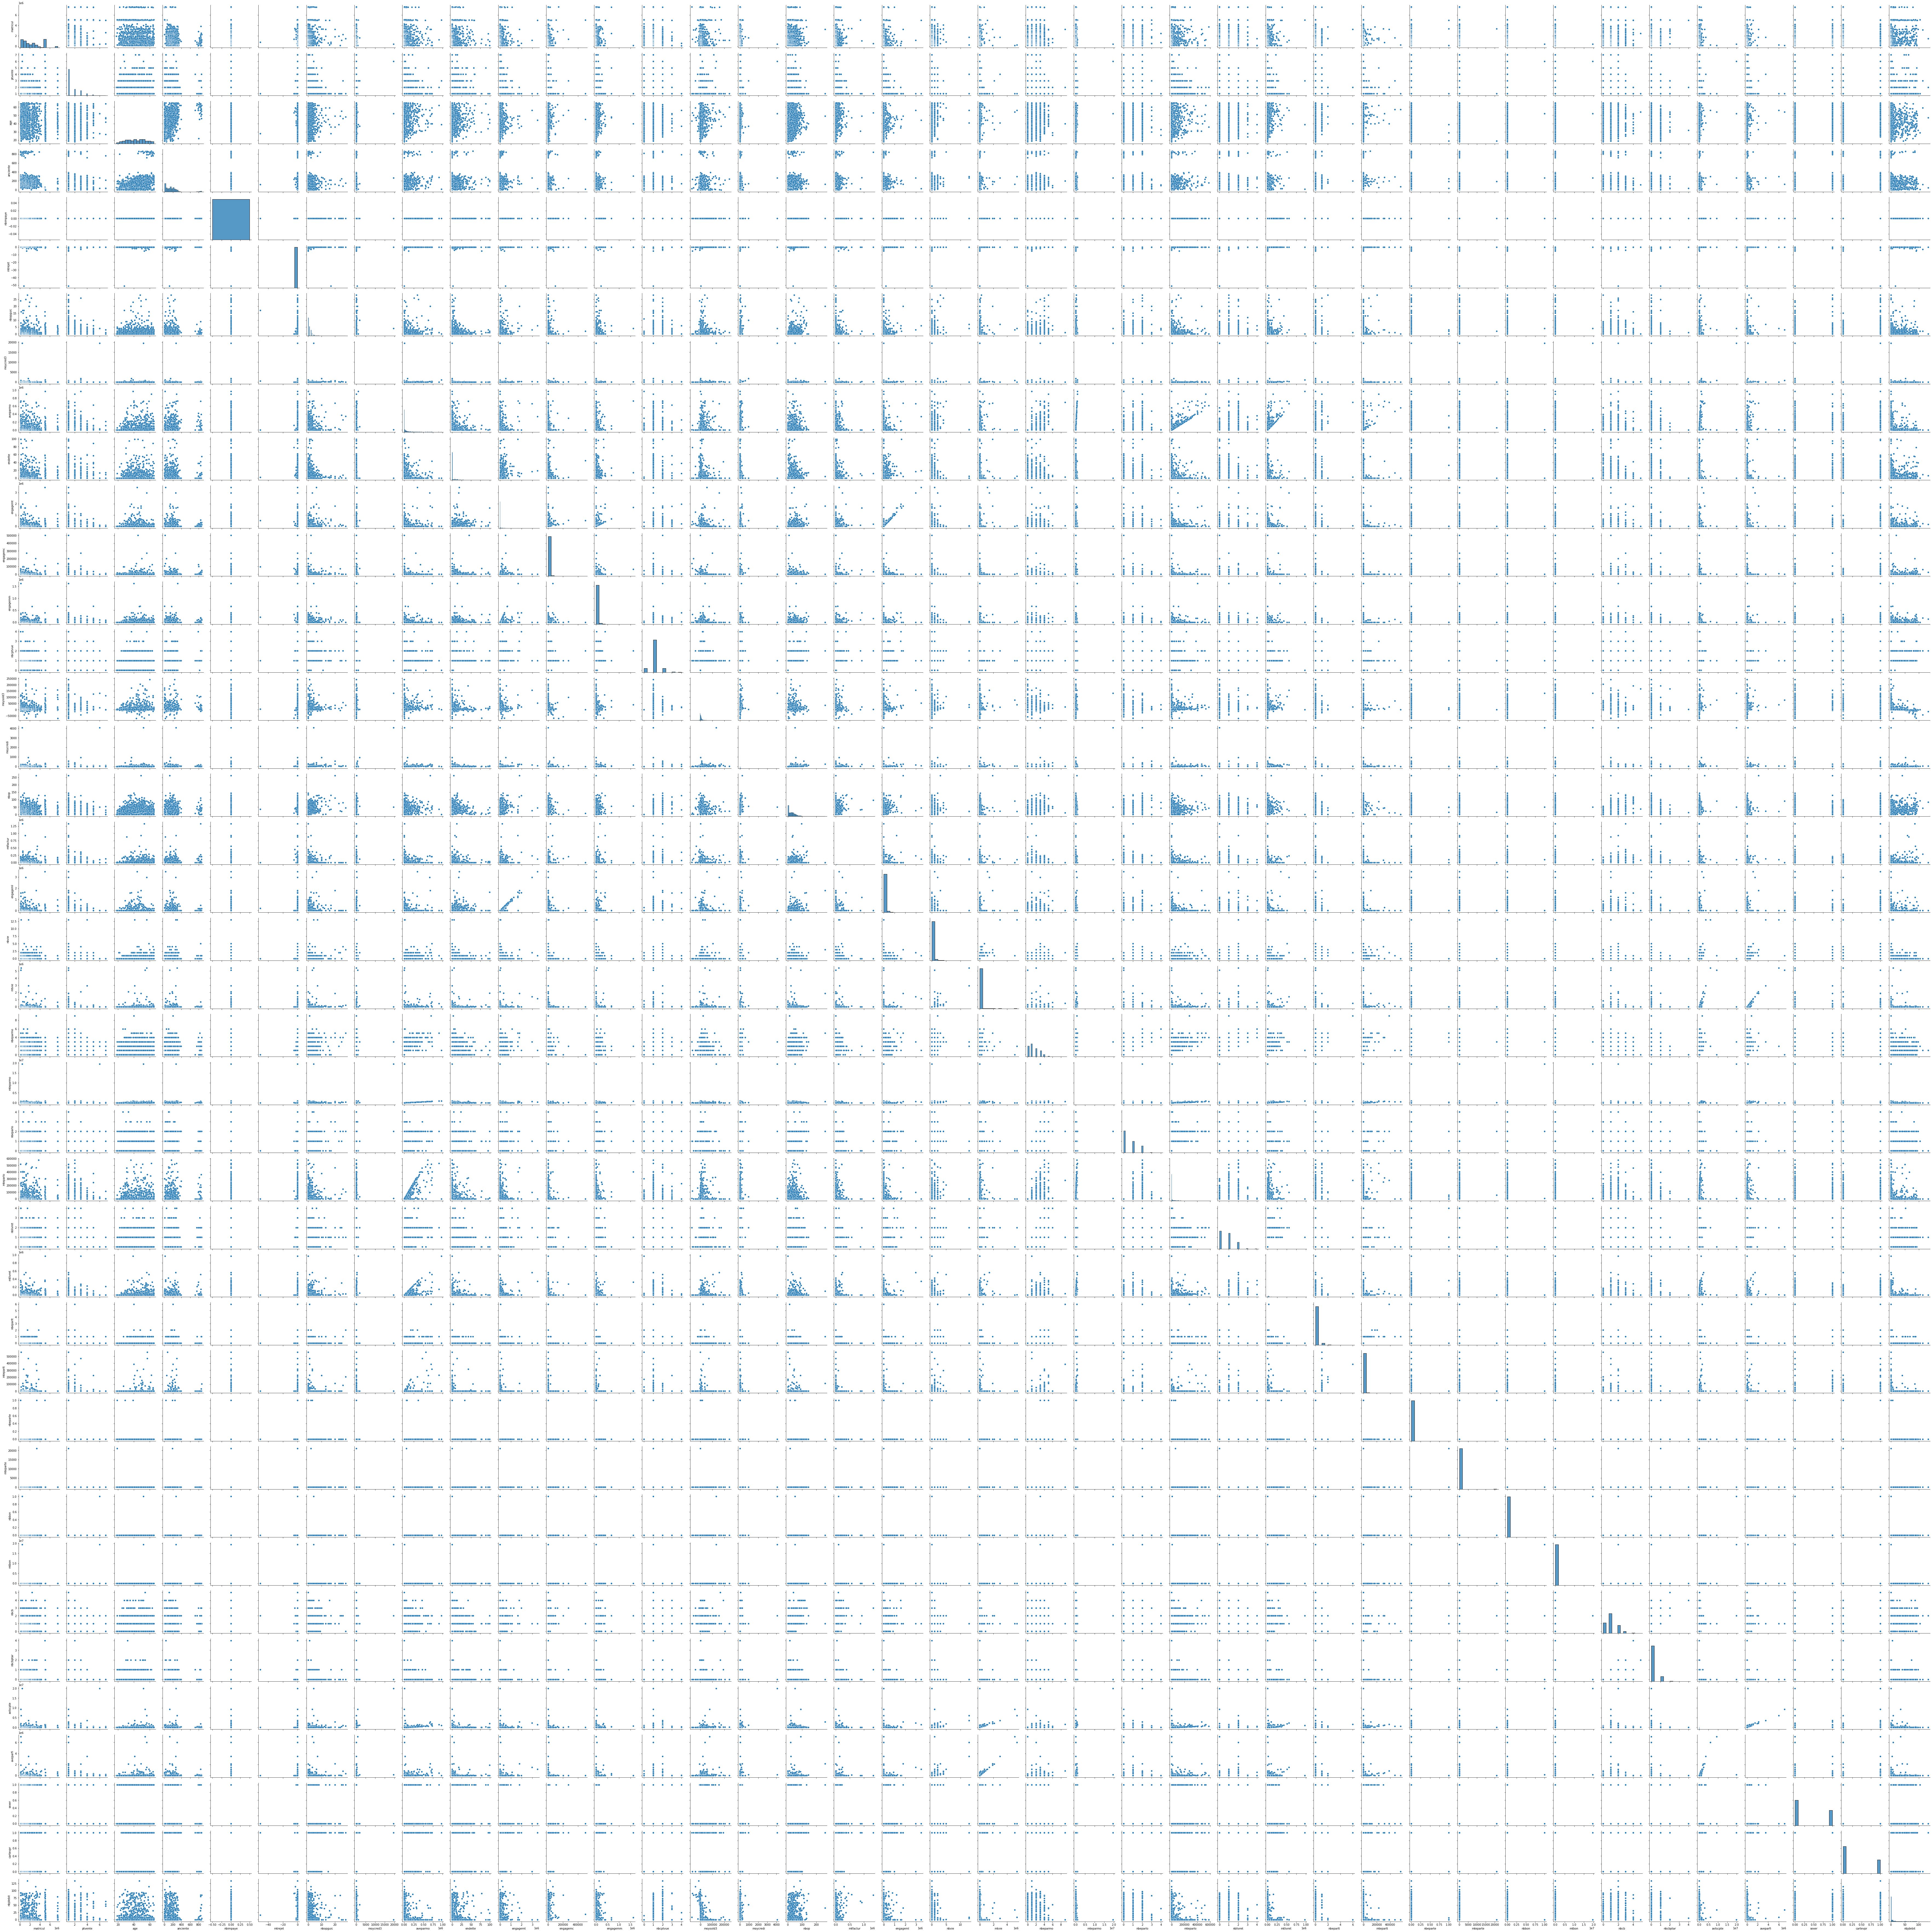

In [ ]:
sns.pairplot(df[df.columns])

# **Modeling**

In [ ]:
# Créer un trainset et un testset
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [ ]:
# Vérifier le nombre de valeurs de la variable "target" selectionnées dans les deux parties 
# de l'ensemble "trainset"
trainset['cartevpr'].value_counts()

0    560
1    298
Name: cartevpr, dtype: int64

In [ ]:
# Vérifier le nombre de valeurs de la variable "target" selectionnées aléatoirement dans les deux parties
# de l'ensemble "testset"
testset['cartevpr'].value_counts()

0    154
1     61
Name: cartevpr, dtype: int64

In [ ]:
# procédure d'évaluation robuste, claire et informative
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                              train_sizes=np.linspace(0.1, 1, 10))
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

In [ ]:
def encodage(df):
    code  = {'negative':0,
            'positive':1,
            'not_detected':0,
            'detected':1}
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
    return df

In [ ]:
def imputation(df):
    df = df.dropna(axis=0)
    return  df

In [ ]:
def preprocessing(df):
    
    df = encodage(df)
    df = imputation(df)
    
    X = df.drop('cartevpr', axis=1)
    y = df['cartevpr']
    
    print(y.value_counts())
    
    return X, y

In [ ]:
# Vérifier le nombre de valeur "target" du trainSet après le pré-processing
X_train, y_train = preprocessing(trainset)

0    560
1    298
Name: cartevpr, dtype: int64


In [ ]:
# Vérifier le nombre de valeur "target" du testSet après le pré-processing
X_test, y_test = preprocessing(testset)

0    154
1     61
Name: cartevpr, dtype: int64


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


[[127  27]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       154
           1       0.61      0.70      0.66        61

    accuracy                           0.79       215
   macro avg       0.75      0.76      0.75       215
weighted avg       0.80      0.79      0.79       215



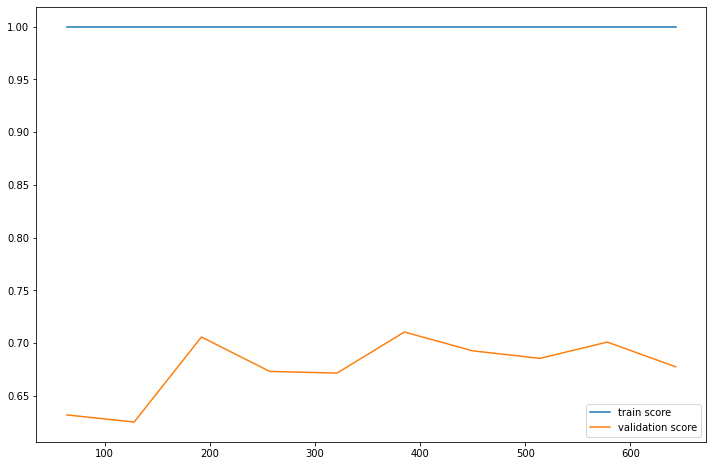

In [ ]:
model = DecisionTreeClassifier()

model.fit(X_train, y_train)

evaluation(model)

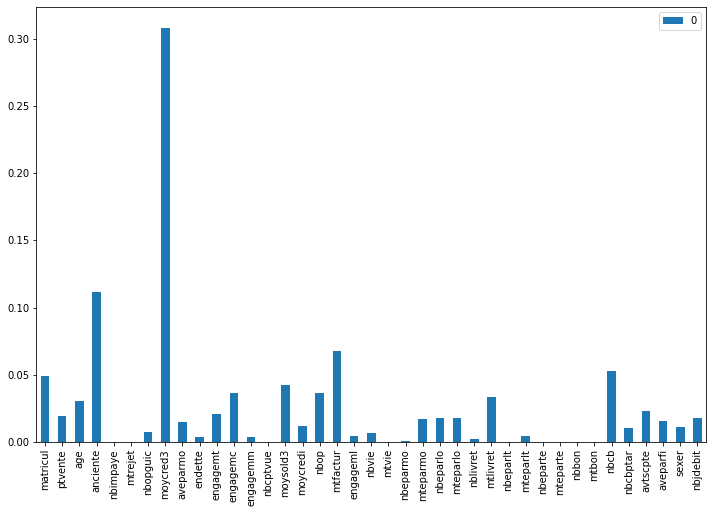

In [ ]:
# Variables Importantes
pd.DataFrame(model.feature_importances_, index=X_train.columns).plot.bar(figsize=(12, 8))

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/lo

[[130  24]
 [ 15  46]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       154
           1       0.66      0.75      0.70        61

    accuracy                           0.82       215
   macro avg       0.78      0.80      0.79       215
weighted avg       0.83      0.82      0.82       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4   5  29  30  31  32  43  44  68  69  70  71  81  82 106 107 108 109
 118 119 143 144 145 146 154 155 179 180 181 182 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 281 282 283 284 313 314 315 316 344
 345 346 347 374 375 376 377 403 404 405 406 421 422 429 430 431 432 433
 434 436 438 448 449 458 459 460 461 484 485 486 487 509 510 511 512 533
 534 535 536 556 557 558 559 578 579 580 581 599 600 601 602 617 618 619
 620 621 622 636 637 638 639 640 641 656 657 658 659 673 674 675 676 689
 690 691 692 704 705 706 707 718 719 720 721 731 732 733 734 743 744 745
 746 751 754 755 756 757 762 764 765 766 767 768 769 770 771 772 773 774
 775 77

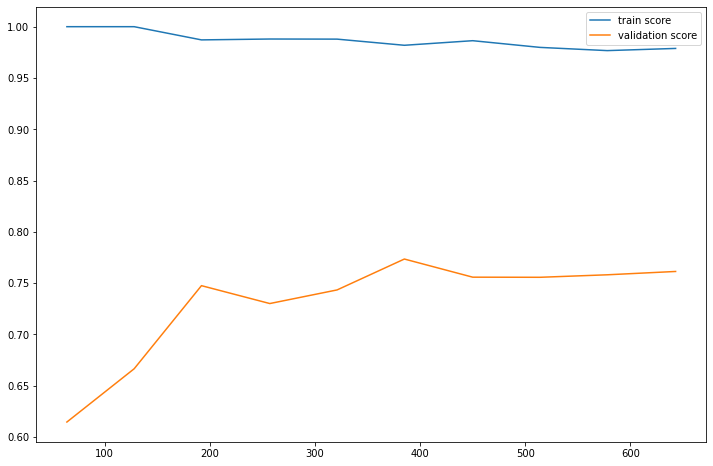

In [ ]:
model_2 = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10),
                      RandomForestClassifier(random_state=0))

model_2.fit(X_train, y_train)

evaluation(model_2)


In [ ]:
prepocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [ ]:
RandomForest = make_pipeline(prepocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(prepocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(prepocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(prepocessor, StandardScaler(), KNeighborsClassifier())

In [ ]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost': AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN}

RandomForest


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


[[130  24]
 [ 15  46]]
              precision    recall  f1-score   support

           0       0.90      0.84      0.87       154
           1       0.66      0.75      0.70        61

    accuracy                           0.82       215
   macro avg       0.78      0.80      0.79       215
weighted avg       0.83      0.82      0.82       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4   5  29  30  31  32  43  44  68  69  70  71  81  82 106 107 108 109
 118 119 143 144 145 146 154 155 179 180 181 182 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212
 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230
 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248
 249 250 251 252 253 254 255 256 257 281 282 283 284 313 314 315 316 344
 345 346 347 374 375 376 377 403 404 405 406 421 422 429 430 431 432 433
 434 436 438 448 449 458 459 460 461 484 485 486 487 509 510 511 512 533
 534 535 536 556 557 558 559 578 579 580 581 599 600 601 602 617 618 619
 620 621 622 636 637 638 639 640 641 656 657 658 659 673 674 675 676 689
 690 691 692 704 705 706 707 718 719 720 721 731 732 733 734 743 744 745
 746 751 754 755 756 757 762 764 765 766 767 768 769 770 771 772 773 774
 775 77

-------------------------------------------------------------
AdaBoost
[[137  17]
 [ 19  42]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88       154
           1       0.71      0.69      0.70        61

    accuracy                           0.83       215
   macro avg       0.80      0.79      0.79       215
weighted avg       0.83      0.83      0.83       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/lo

-------------------------------------------------------------
SVM
[[133  21]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       154
           1       0.67      0.70      0.69        61

    accuracy                           0.82       215
   macro avg       0.78      0.78      0.78       215
weighted avg       0.82      0.82      0.82       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  29  30  31  32  43  68  69  70  71  81 106 107 108 109 118 143 144
 145 146 154 179 180 181 182 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 237 238 239 242 243 246 247 248 249 250 251 253
 255 256 281 282 283 284 313 314 315 316 344 345 346 347 374 375 376 377
 403 404 405 406 421 422 431 432 433 434 458 459 460 461 484 485 486 487
 509 510 511 512 533 534 535 536 556 557 558 559 578 579 580 581 599 600
 601 602 617 618 619 620 621 622 636 637 638 639 640 641 656 657 658 659
 673 674 675 676 689 690 691 692 704 705 706 707 718 719 720 721 731 732
 733 734 743 744 745 746 754 755 756 757 764 765 766 767 768 769 770 771
 772 773 774 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789
 790 791 792 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/py

-------------------------------------------------------------
KNN
[[130  24]
 [ 18  43]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       154
           1       0.64      0.70      0.67        61

    accuracy                           0.80       215
   macro avg       0.76      0.77      0.77       215
weighted avg       0.81      0.80      0.81       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/lo

-------------------------------------------------------------


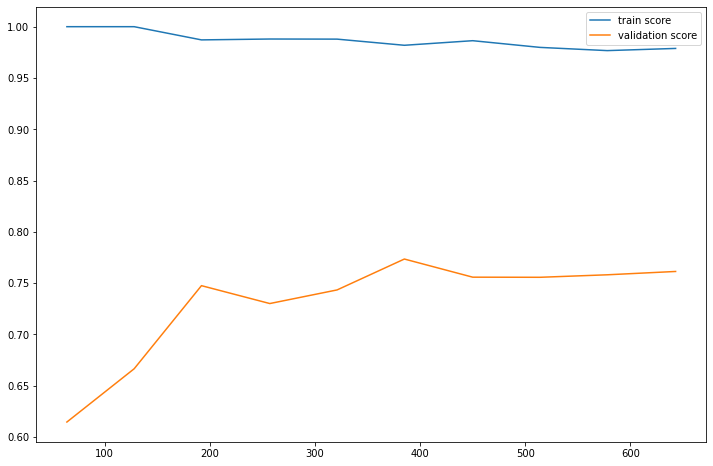

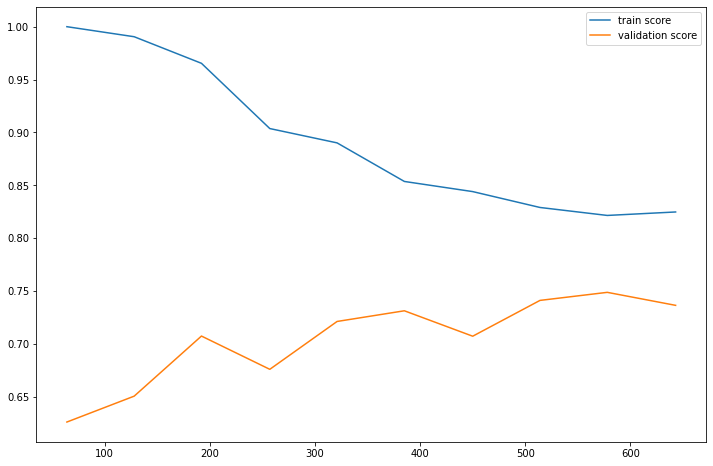

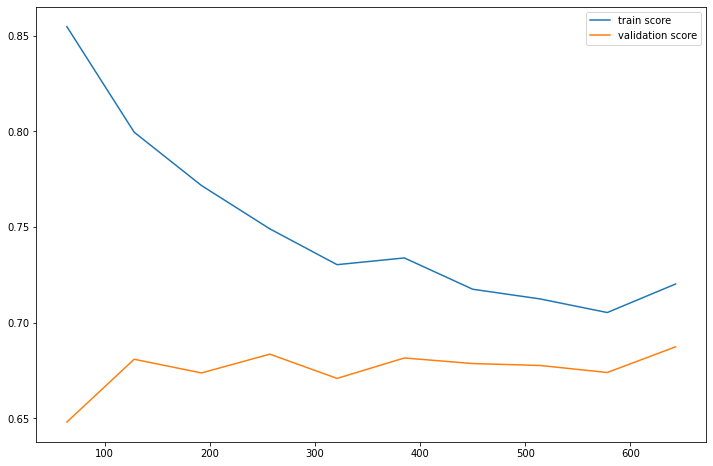

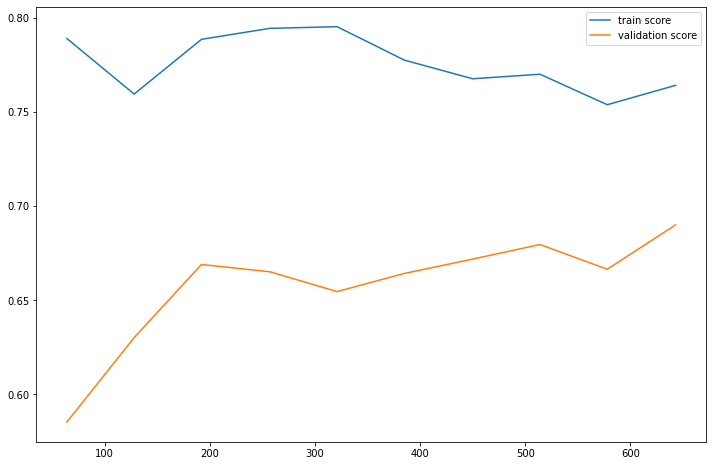

In [ ]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)
    print("-------------------------------------------------------------")

In [ ]:

SVM

Pipeline(memory=None,
         steps=[('pipeline',
                 Pipeline(memory=None,
                          steps=[('polynomialfeatures',
                                  PolynomialFeatures(degree=2,
                                                     include_bias=False,
                                                     interaction_only=False,
                                                     order='C')),
                                 ('selectkbest',
                                  SelectKBest(k=10,
                                              score_func=<function f_classif at 0x7fc91fe24170>))],
                          verbose=False)),
                ('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel

In [ ]:
hyper_params = {'pipeline__polynomialfeatures__degree': [2, 3, 4],
                'pipeline__selectkbest__k': range(40, 100),
                'svc__gamma':[1e-3, 1e-4], 
                'svc__C': [1, 10, 100, 1000]}

In [ ]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4, n_iter=300)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 689 690 691 692 704 705 706 707 719
 720 721 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771
 772 774 775 776 777 778 779 780 781 7

{'svc__gamma': 0.001, 'svc__C': 1000, 'pipeline__selectkbest__k': 44, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.70      0.66      0.68        61

    accuracy                           0.82       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.82      0.82      0.82       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


In [ ]:
evaluation(grid.best_estimator_)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  30  31  32  43  69  70  71  81 107 108 109 118 144 145 146 154 180
 181 182 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204
 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222
 223 238 239 246 247 248 249 250 251 282 283 284 314 315 316 345 346 347
 375 376 377 404 405 406 432 433 434 459 460 461 485 486 487 510 511 512
 534 535 536 557 558 559 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 657 658 659 674 675 676 690 691 692 705 706 707 719 720 721
 732 733 734 743 744 745 746 754 755 756 757 765 766 767 769 771 772 774
 775 776 777 778 779 780 781 782 783 784 785 786 787 788 789 790 791 792
 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/lo

[[137  17]
 [ 21  40]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       154
           1       0.70      0.66      0.68        61

    accuracy                           0.82       215
   macro avg       0.78      0.77      0.78       215
weighted avg       0.82      0.82      0.82       215



/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [  4  29  30  31  32  43  68  69  70  71  81 106 107 108 109 118 143 144
 145 146 154 179 180 181 182 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 238 239 246 247 248 249 250 251 256 281 282 283
 284 313 314 315 316 344 345 346 347 374 375 376 377 403 404 405 406 431
 432 433 434 458 459 460 461 484 485 486 487 509 510 511 512 533 534 535
 536 556 557 558 559 578 579 580 581 599 600 601 602 619 620 621 622 638
 639 640 641 656 657 658 659 673 674 675 676 689 690 691 692 704 705 706
 707 718 719 720 721 731 732 733 734 743 744 745 746 754 755 756 757 764
 765 766 767 768 769 770 771 772 773 774 775 776 777 778 779 780 781 782
 783 784 785 786 787 788 789 790 791 792 793 794 795 796 797] are constant.
  UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selecti

# **Model Performances**

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

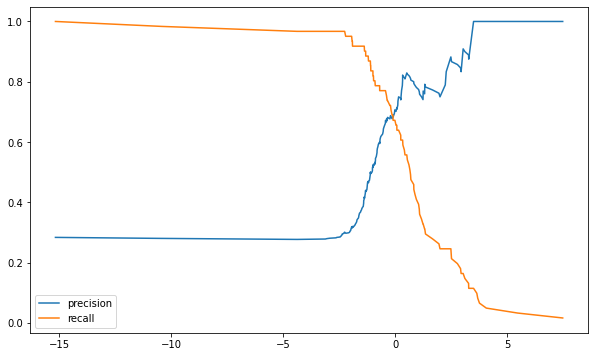

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X,  threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [ ]:
f1_score(y_test, y_pred)

0.6369426751592356

In [ ]:
recall_score(y_test, y_pred)

0.819672131147541